# Examen primer parcial
### Rafael Takata García
#### Programación para analísis de datos

Queremos saber las respuestas a las siguientes preguntas: 
 1. How many observations are there?
 2. How many features are there?
 3. What type of “native-country” feature is it?
 4. What is the average age of the entire dataset?
 5. Does age follow a normal distribution? How do you know?
 6.  How many women with master's degrees are in the dataset?

#### Según la documentación estas son las variables:
age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


In [2]:
#Importamos las librerías
import pandas as pd #Manejo de dataframes
import matplotlib.pyplot as plt #Gráficas
import numpy as np #arrays


In [39]:
# Creamos una columna para el nombre de las variables.
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship',
         'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
#Creamos el dataframe
adult_df = pd.read_csv('../data/raw/adult/adult.data', names=col_names)
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


 1. How many observations are there?

In [18]:
adult_df.info() #Hay 32561 entradas u observaciones 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


2. How many features are there?

In [22]:
rows, columns =adult_df.shape
print(columns)

15


Sin embargo, tenemos que la variable income es el target y no puede ser contado como feature por lo tanto solo hay 14.

3. What type of “native-country” feature is it?

In [24]:
adult_df['native-country'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 32561 entries, 0 to 32560
Series name: native-country
Non-Null Count  Dtype 
--------------  ----- 
32561 non-null  object
dtypes: object(1)
memory usage: 254.5+ KB


In [29]:
adult_df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

Es una variable de tipo texto que categoriza el lugar de origen de la persona incensada, por lo tanto, es una variable de tipo categórica.

 4. What is the average age of the entire dataset?

In [35]:
print(f'La edad promedio del dataset entero es: {adult_df['age'].mean()}')

La edad promedio del dataset entero es: 38.58164675532078


5. Does age follow a normal distribution? How do you know?

<Axes: >

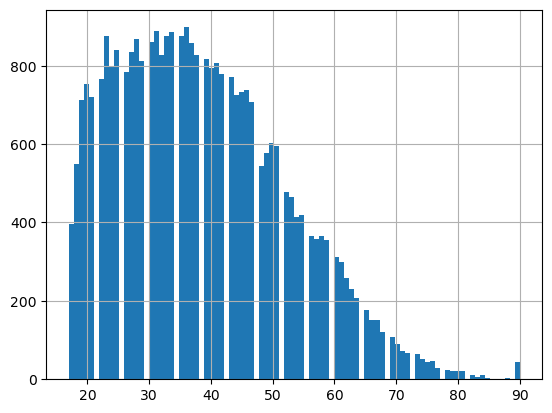

In [44]:
adult_df['age'].hist(bins=90)

In [45]:
adult_df['age'].skew()

0.5587433694130484

In [46]:
adult_df['age'].kurt()

-0.16612745957143904

6.  How many women with master's degrees are in the dataset?

In [53]:
adult_df[(adult_df['sex'] == ' Female') & (adult_df['education'] == ' Masters')]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
19,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
47,44,Private,128354,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,<=50K
102,47,Self-emp-not-inc,149116,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,50,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32361,55,Local-gov,166502,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,45,United-States,<=50K
32473,41,Federal-gov,160467,Masters,14,Divorced,Prof-specialty,Unmarried,White,Female,1506,0,40,United-States,<=50K
32504,50,Private,208630,Masters,14,Divorced,Sales,Not-in-family,White,Female,0,0,50,United-States,>50K
32513,46,Private,42972,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,22,United-States,>50K


In [54]:
len(adult_df[(adult_df['sex'] == ' Female') & (adult_df['education'] == ' Masters')])

536

Hay 536 mujeres con un Masters Degree